# Import 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

# Utils

In [4]:
def random_batch(X_train, y_train, batch_size):
    perm = np.random.randint(X_train.shape[0], size=batch_size)
    return X_train[perm], y_train[perm]

# Data Load 

In [2]:
from itertools import product
from functools import partial

def poly3d(x, y, a, b):
    return a * x * y + b

def sine(x, y):
    return np.cos(np.sqrt(x ** 2 + y ** 2))

def saddle(x, y):
    return x ** 2 - y ** 2

ranges = [-6, 6, .1]

x, y = np.arange(*ranges), np.arange(*ranges)

X, Y = np.meshgrid(x, y)

X = np.c_[X.reshape(-1, 1), Y.reshape(-1, 1)]

# f = partial(poly3d, a=2, b=6)

y = sine(X[:, 0], X[:, 1]) #+ np.random.normal(0, .1, len(X))

## Plot

<IPython.core.display.Javascript object>


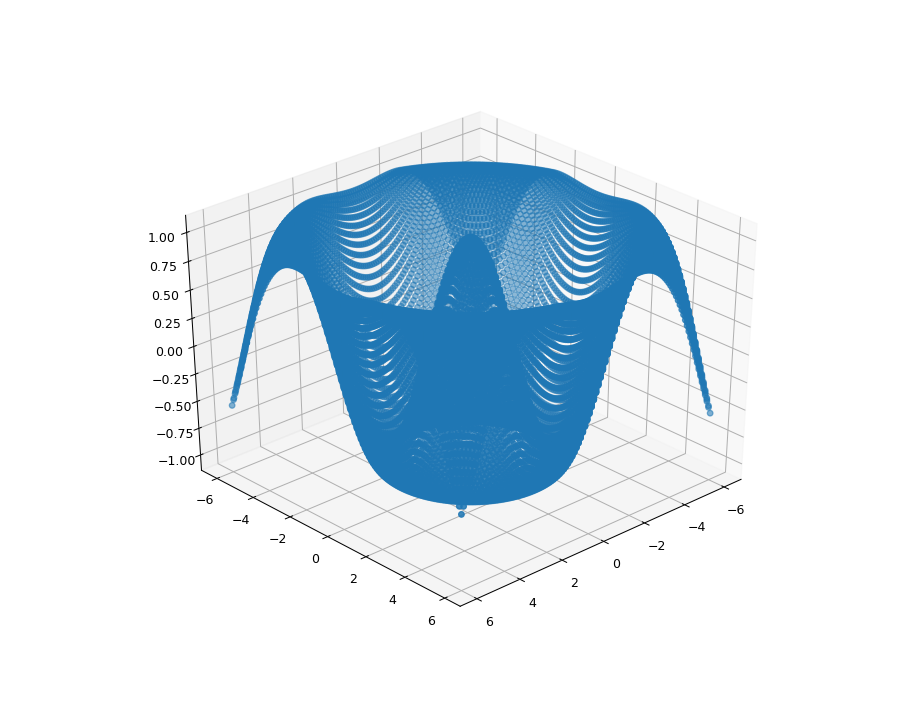

In [3]:
%matplotlib notebook
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3D(X, Y, Z, C=None, axes=None):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    if axes is None:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca(projection='3d')
        ax.scatter(X, Y, Z, c=C)
    else:
        axes.scatter(X, Y, Z, c=C)
    
    
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 8))
plot_3D(X[:, 0], X[:, 1], y, axes=ax)

# Model Build

In [5]:
import keras

class LiveLearning(keras.callbacks.Callback):
    
    def _plot(self, data, model, figsize=(8, 8)):
        X_val, y_val = data[0], data[1]
        y_pred = model.predict(X_val)

        clear_output(wait=True)

        fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=figsize)
        
        X, Y = X_val[:, 0], X_val[:, 1]

        plot_3D(X, Y, y_val, axes=ax)
        plot_3D(X, Y, y_pred, C='r', axes=ax)

        plt.show()
 
    def on_epoch_begin(self, epoch, logs={}):
        self._plot(self.validation_data, self.model)
        return


Using TensorFlow backend.


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.regularizers import l1, l2

def build_nn(n_inputs, lr=.01):
    model = Sequential([
        Dense(16, input_dim=n_inputs, activation='elu', kernel_initializer='he_normal', kernel_regularizer=l2(.000)),
        Dense(16, activation='elu', kernel_initializer='he_normal', kernel_regularizer=l2(.000)),
        Dense(1, activation='linear', kernel_initializer='he_normal'),
    ])
    model.compile(Adam(lr=lr, decay=lr * 10 ** -4), loss='mae', metrics=['mae'])
    return model


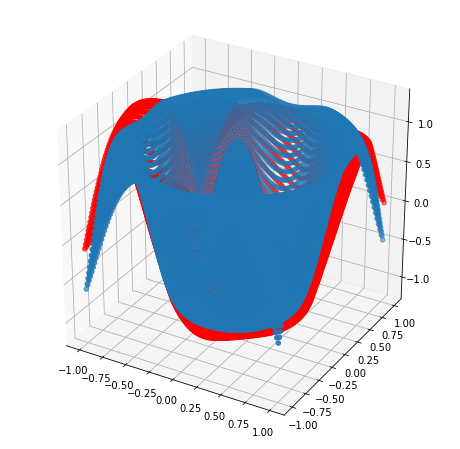

KeyboardInterrupt: 

In [13]:
%matplotlib inline

import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler

n_epochs = 100
batch_size = 512
n_batches = X.shape[0] // batch_size

scaler = MinMaxScaler(feature_range=(-1, 1))

X = scaler.fit_transform(X)

nn = build_nn(2, .05)

for epoch in range(n_epochs):

    for _ in range(n_batches):
        X_batch, y_batch = random_batch(X, y, batch_size)
        nn.fit(X_batch, y_batch, validation_data=[X, y], verbose=0, callbacks=[LiveLearning()])
        
        